# BAB PENGENALAN

 - Nama  : Farand Austen Mahesa
 - Kelas : Full bootcamp Data Science      

Problems
Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?

Keterangan Dataset:

- user_id = id pelanggan
- timestamp = Waktu ketika pelanggan mengakses laman web
- group = grup kontrol dan treatment
- landing_page = landing page yang diakses oleh pelanggan (laman lama atau laman baru)
- purchased = 0 : tidak ada pembelian, and 1: ada pembelian

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools

In [2]:
df = pd.read_csv("purchase_data.txt", sep = ';', error_bad_lines = False)

In [3]:
df

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [4]:
#df['timestamp'] = df['timestamp'].astype('datetime64[s]')

In [5]:
#df['timestamp']

In [6]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
purchased       0
dtype: int64

In [7]:
df.describe()

,user_id,purchased
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   purchased     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [9]:
df['timestamp'].unique()

array(['2017-01-21 22:11:48.556739', '2017-01-12 08:01:45.159739',
       '2017-01-11 16:55:06.154213', ..., '2017-01-22 11:45:03.439544',
       '2017-01-15 01:20:28.957438', '2017-01-16 12:40:24.467417'],
      dtype=object)

In [10]:
df['purchased'].unique()

array([0, 1], dtype=int64)

In [11]:
df['group'].unique()

array(['control', 'treatment'], dtype=object)

In [12]:
df['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [13]:
bayar = df[df['purchased'] == 1 ]
bayar

,user_id,timestamp,group,landing_page,purchased
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
15,644214,2017-01-22 02:05:21.719434,control,old_page,1
...,...,...,...,...,...
294396,838593,2017-01-15 09:56:31.455023,treatment,new_page,1
294405,712217,2017-01-11 10:34:30.176801,control,old_page,1
294420,795742,2017-01-09 01:06:58.299207,control,old_page,1
294430,733871,2017-01-21 17:54:08.810964,treatment,new_page,1


In [14]:
tbayar = df[df['purchased'] == 0 ]
tbayar

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


purchased skewness: 2.3437251398234857
purchased kurtosis: 3.493071254812598


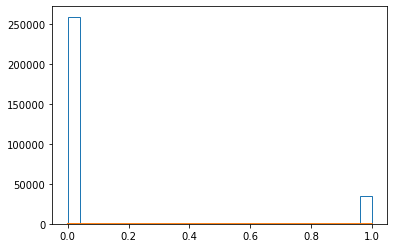

In [15]:
numcols = ['purchased']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

# Hipotesis Testing

TWO SAMPLE TEST

- The null hypothesis (H0) is that the population mean grade for students with previous math studies is not greater than the population mean grade for students without any math experience, and the fact that our sample mean for math students is higher than our sample mean for non-math students can be explained by random chance in our sample selection.
- The alternative hypothesis (H1) is that the population mean grade for students with previous math studies is greater than the population mean grade for students without any math experience.


We can write these as mutually exclusive expressions like this:

        - H0:μ1≤μ2
        - H1:μ1>μ2

In [28]:
group1 = df[df['group'] == 'control']
group2 = df[df['group'] == 'treatment']

landing_page1 = df[df['landing_page'] == 'old_page']
landing_page2 = df[df['landing_page'] == 'new_page']

Control sample mean:0.12039917935897611
Control sample std:0.3254288500041035
Control Kurtosis:3.442741489634203
Treatment sample mean:0.11891957956489856
t-statistic:-1.2369191070650907
p-value:0.108059


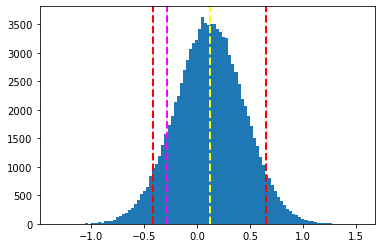

In [36]:
nonMath =group1['purchased']
math = group2['purchased']
print("Control sample mean:" + str(nonMath.mean()))
print("Control sample std:" + str(nonMath.std()))
print("Control Kurtosis:" + str(nonMath.kurtosis()))
print("Treatment sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Old Page sample mean:0.12047759085568362
Old Page sample std:0.32552029218905587
Old Page Kurtosis:3.4374369502126414
New Page sample mean:0.11884079625642663
t-statistic:-1.368333843398843
p-value:0.085604


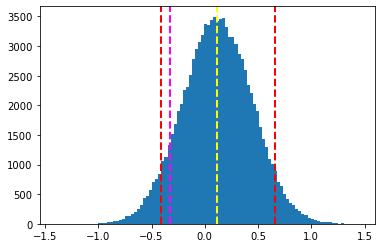

In [37]:
nonMath =landing_page1['purchased']
math = landing_page2['purchased']
print("Old Page sample mean:" + str(nonMath.mean()))
print("Old Page sample std:" + str(nonMath.std()))
print("Old Page Kurtosis:" + str(nonMath.kurtosis()))
print("New Page sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In [35]:
res = stats.ttest_ind(df[df.group == 'control'].purchased, 
                      df[df.group == 'treatment'].purchased,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1081


# MEASURES OF TENDENCY DATA

In [21]:
colom = ['user_id', 'purchased']
for col in colom:
    print ('Mean ' + df[col].name + ' = ' + str(df[col].mean()))
    
 

Mean user_id = 787974.1247325776
Mean purchased = 0.11965919355605512


In [22]:
colom = ['user_id', 'purchased']
for col in colom:
    print ('Median ' + df[col].name + ' = ' + str(df[col].median()))   

Median user_id = 787933.5
Median purchased = 0.0


In [23]:
colom = ['user_id', 'purchased']
for col in colom:
    print ('Modus ' + df[col].name + ' = ' + str(df[col].mode()))   

Modus user_id = 0       630052
1       630126
2       630137
3       630320
4       630471
         ...  
3889    945627
3890    945645
3891    945703
3892    945797
3893    945971
Length: 3894, dtype: int64
Modus purchased = 0    0
dtype: int64


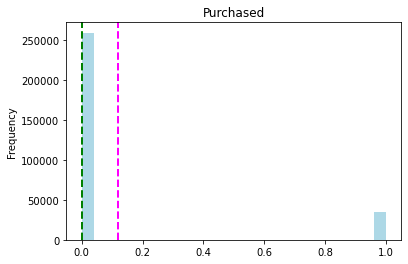

In [38]:
salary = df['purchased']
salary.plot.hist(title='Purchased', color='lightblue', bins=25)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# A/B TESTING

In [51]:
from itertools import permutations
clickthrough_A= np.array(landing_page1['purchased'])
clickthrough_B= np.array(landing_page2['purchased'])
np.random.shuffle(clickthrough_A)
np.random.shuffle(clickthrough_B)

def permutation_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1 , perm_sample_2
    #return perm_sample_1.shape ,perm_sample_2.shape

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Compute difference of mean impact force from experiment
diff_frac_obs = diff_frac(clickthrough_A,clickthrough_B)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(clickthrough_A, clickthrough_B,diff_frac, size=10000)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
print('The p-value is %f' % p_value)

The p-value is 0.914000


In [52]:
from itertools import permutations
clickthrough_A= np.array(group1['purchased'])
clickthrough_B= np.array(group2['purchased'])
np.random.shuffle(clickthrough_A)
np.random.shuffle(clickthrough_B)

def permutation_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1 , perm_sample_2
    #return perm_sample_1.shape ,perm_sample_2.shape

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A

def draw_perm_reps(data_1, data_2, func, size=1):

    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Compute difference of mean impact force from experiment
diff_frac_obs = diff_frac(clickthrough_A,clickthrough_B)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(clickthrough_A, clickthrough_B,diff_frac, size=10000)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
print('The p-value is %f' % p_value)

The p-value is 0.894900


# OVERALL ANALYSIS

 - Kolom group terdapat treatment dan control memiliki pvalue= 0.108059 yang artinya menerima H0, h0 lebih besar dari h1
 - Kolom landing page terdapat old page dan new page memiliki pvalue = 0.08564 yang artinya menerima H0, h0 lebih besar dari h1
 
 - Pada purchased 1 dan purchase 0, purchased 1 memiliki rentang yang tinggi dari purcashed 0
 
 Pada A/B TESTING:
 - Pada kolom group memiliki p-value = 0.91400 yang dimana menerima h0 yang artinya tidak berpengaruh pada keadaan
 - Pada kolom landing page memiliki p-value = 0.894900 yang dimana menerima h0 yang artinya tidak berpengaruh pada keadaan